In [1]:
import japanize_matplotlib as jm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from full_fred.fred import Fred


jm.japanize()

## サンプルデータ
[Natural Gas Consumption (NATURALGAS)](https://fred.stlouisfed.org/series/NATURALGAS)のデータを使用しています。数値の単位はBCF（10億立方フィート）です。

In [2]:
data = {
    "value": {
        "2013-01-01": 2878.8,
        "2013-02-01": 2567.2,
        "2013-03-01": 2521.1,
        "2013-04-01": 1967.5,
        "2013-05-01": 1752.5,
        "2013-06-01": 1742.9,
        "2013-07-01": 1926.3,
        "2013-08-01": 1927.4,
        "2013-09-01": 1767.0,
        "2013-10-01": 1866.8,
        "2013-11-01": 2316.9,
        "2013-12-01": 2920.8,
        "2014-01-01": 3204.1,
        "2014-02-01": 2741.2,
        "2014-03-01": 2557.9,
        "2014-04-01": 1961.7,
        "2014-05-01": 1810.2,
        "2014-06-01": 1745.4,
        "2014-07-01": 1881.0,
        "2014-08-01": 1933.1,
        "2014-09-01": 1809.3,
        "2014-10-01": 1912.8,
        "2014-11-01": 2357.5,
        "2014-12-01": 2679.2,
        "2015-01-01": 3115.0,
        "2015-02-01": 2925.2,
        "2015-03-01": 2591.3,
        "2015-04-01": 2007.9,
        "2015-05-01": 1858.2,
        "2015-06-01": 1899.9,
        "2015-07-01": 2067.7,
        "2015-08-01": 2052.7,
        "2015-09-01": 1901.3,
        "2015-10-01": 1987.3,
        "2015-11-01": 2249.1,
        "2015-12-01": 2588.2,
        "2016-01-01": 3091.7,
        "2016-02-01": 2652.3,
        "2016-03-01": 2356.3,
        "2016-04-01": 2083.9,
        "2016-05-01": 1965.8,
        "2016-06-01": 2000.7,
        "2016-07-01": 2186.6,
        "2016-08-01": 2208.4,
        "2016-09-01": 1947.8,
        "2016-10-01": 1925.2,
        "2016-11-01": 2159.5,
        "2016-12-01": 2866.3,
        "2017-01-01": 2913.8,
        "2017-02-01": 2340.2,
        "2017-03-01": 2523.3,
        "2017-04-01": 1932.0,
        "2017-05-01": 1892.0,
        "2017-06-01": 1910.4,
        "2017-07-01": 2141.6,
        "2017-08-01": 2093.8,
        "2017-09-01": 1920.5,
        "2017-10-01": 2031.5,
        "2017-11-01": 2357.3,
        "2017-12-01": 3086.0,
        "2018-01-01": 3340.9,
        "2018-02-01": 2710.7,
        "2018-03-01": 2796.7,
        "2018-04-01": 2350.5,
        "2018-05-01": 2055.0,
        "2018-06-01": 2063.1,
        "2018-07-01": 2350.7,
        "2018-08-01": 2313.8,
        "2018-09-01": 2156.1,
        "2018-10-01": 2285.9,
        "2018-11-01": 2715.9,
        "2018-12-01": 2999.5,
        "2019-01-01": 3424.3,
        "2019-02-01": 3019.1,
        "2019-03-01": 2927.8,
        "2019-04-01": 2212.4,
        "2019-05-01": 2134.0,
        "2019-06-01": 2119.3,
        "2019-07-01": 2393.9,
        "2019-08-01": 2433.9,
        "2019-09-01": 2206.3,
        "2019-10-01": 2306.5,
        "2019-11-01": 2783.8,
        "2019-12-01": 3170.7,
        "2020-01-01": 3320.6,
        "2020-02-01": 3058.5,
        "2020-03-01": 2722.0,
        "2020-04-01": 2256.9,
        "2020-05-01": 2072.2,
        "2020-06-01": 2127.9,
        "2020-07-01": 2464.1,
        "2020-08-01": 2399.5,
        "2020-09-01": 2151.2,
        "2020-10-01": 2315.9,
        "2020-11-01": 2442.0,
        "2020-12-01": 3182.8,
        "2021-01-01": 3343.9,
        "2021-02-01": 3099.2,
        "2021-03-01": 2649.4,
        "2021-04-01": 2265.1,
        "2021-05-01": 2117.4,
        "2021-06-01": 2238.4,
        "2021-07-01": 2412.2,
        "2021-08-01": 2433.8,
        "2021-09-01": 2142.3,
        "2021-10-01": 2262.6,
        "2021-11-01": 2693.3,
        "2021-12-01": 3007.3,
        "2022-01-01": 3612.1,
        "2022-02-01": 3064.2,
        "2022-03-01": 2785.4,
        "2022-04-01": 2379.3,
        "2022-05-01": 2247.8,
        "2022-06-01": 2326.9,
        "2022-07-01": 2597.9,
        "2022-08-01": 2566.1,
        "2022-09-01": 2263.3,
    }
}
data = pd.DataFrame(data)
data.rename(columns={"value": "Natural Gas Consumption(BCF)"}, inplace=True)
data.index = pd.to_datetime(data.index)
data.head()

,Natural Gas Consumption(BCF)
2013-01-01,2878.8
2013-02-01,2567.2
2013-03-01,2521.1
2013-04-01,1967.5
2013-05-01,1752.5


<AxesSubplot:>

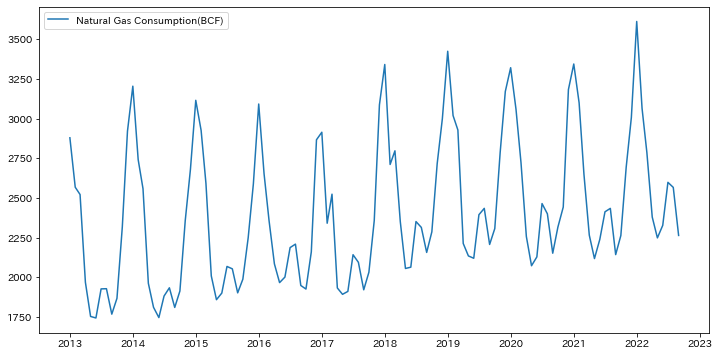

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data)

## 単純移動平均(SMA)
単純移動平均線（Simple Moving Average：SMA）は最もシンプルな移動平均の計算方法です。一定期間の値の平均値を計算します。

<AxesSubplot:>

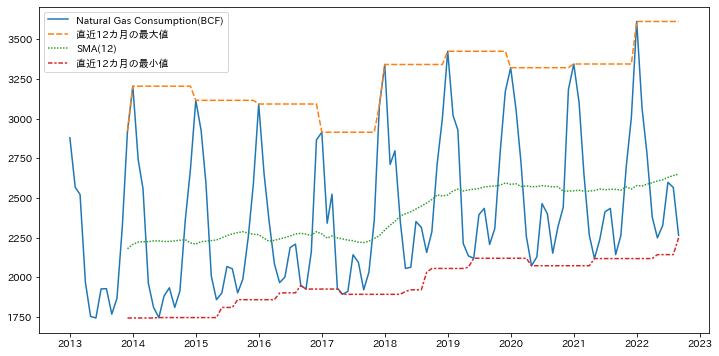

In [4]:
data_example = data.copy()
data_example["直近12カ月の最大値"] = (
    data_example["Natural Gas Consumption(BCF)"].rolling(12).max()
)
data_example["SMA(12)"] = (
    data_example["Natural Gas Consumption(BCF)"].rolling(12).mean()
)
data_example["直近12カ月の最小値"] = (
    data_example["Natural Gas Consumption(BCF)"].rolling(12).min()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_example)

## 加重移動平均
`wma`が加重移動平均を計算する関数です。`w = np.array([0, 1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 0])`の箇所で加重移動平均の係数を指定しています。
`center=True`のパラメタが結果に大きく影響するので必ず期待したデータかどうか確認します。

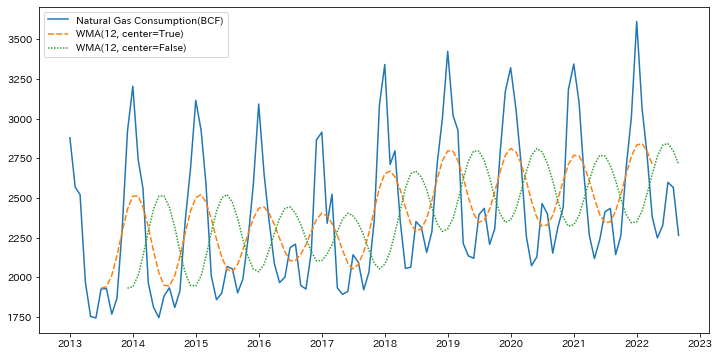

In [5]:
def get_wma(s, w=np.array([0, 1, 2, 3, 4, 5, 5, 4, 3, 2, 1, 0])):
    """移動平均を求める

    Args:
        s (numpy.ndarray): 時系列データ
        w (numpy.ndarray, optional): 窓の重み

    Returns:
        加重移動平均計算後の時系列データ (numpy.ndarray)
    """
    return np.sum(w * s) / w.sum()


data_example = data.copy()
data_example["WMA(12, center=True)"] = (
    data_example["Natural Gas Consumption(BCF)"]
    .rolling(12, center=True)
    .apply(get_wma, raw=True)
)
data_example["WMA(12, center=False)"] = (
    data_example["Natural Gas Consumption(BCF)"]
    .rolling(12, center=False)
    .apply(get_wma, raw=True)
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_example)
plt.show()

## 指数移動平均
[pandas.DataFrame.ewm](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)を用いて計算します。

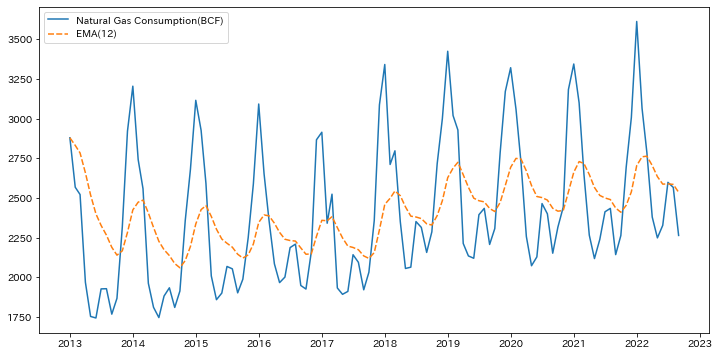

In [6]:
data_example = data.copy()
data_example["EMA(12)"] = (
    data_example["Natural Gas Consumption(BCF)"].ewm(span=12, adjust=False).mean()
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_example)
plt.show()